* Load the dataset into a Pandas DataFrame
* This dataset contains information related to student achievement and treatment status for a growth mindset intervention.
* The columns represent various covariates, including demographic information and school-level characteristics.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('../data/dataset.csv')
print(dataset.head())

   schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2        X3  \
0        76  1  0.081602   6   4   2   1   4  0.334544  0.648586 -1.310927   
1        76  1 -0.385869   4  12   2   1   4  0.334544  0.648586 -1.310927   
2        76  1  0.398184   6   4   2   0   4  0.334544  0.648586 -1.310927   
3        76  1 -0.175037   6   4   2   0   4  0.334544  0.648586 -1.310927   
4        76  1  0.884583   6   4   1   0   4  0.334544  0.648586 -1.310927   

         X4        X5  
0  0.224077 -0.426757  
1  0.224077 -0.426757  
2  0.224077 -0.426757  
3  0.224077 -0.426757  
4  0.224077 -0.426757  


In [3]:
# Columns are renamed to more descriptive names for clarity.
data = dataset.rename(columns={
        'Y': 'StudentAchievementScore',
        'Z': 'GrowthMindsetIntervention',
        'S3': 'FutureSuccessExpectations',
        'C1': 'StudentRaceEthnicity',
        'C2': 'StudentGender',
        'C3': 'FirstGenCollegeStatus',
        'XC': 'SchoolUrbanicity',
        'X1': 'PreInterventionFixedMindset',
        'X2': 'SchoolAchievementLevel',
        'X3': 'SchoolMinorityComposition',
        'X4': 'PovertyConcentration',
        'X5': 'TotalStudentPopulation'
    })

In [4]:
# Define covariates, treatment, and outcome
covariate_cols = ['S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4', 'X5']
treatment_col = 'Z'
outcome_col = 'Y'
# Split the data into training and testing sets
# stratification to ensure that the proportion of treated and control individuals in Z is maintained in both training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset[treatment_col])


0    4904
1    2369
Name: Z, dtype: int64


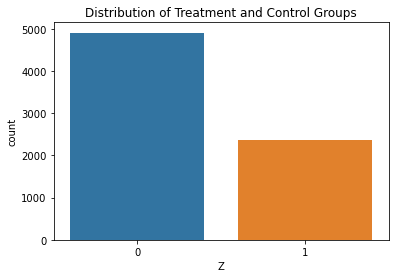

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
# Count the number of treated and control individuals
treatment_counts = train_data[treatment_col].value_counts()
print(treatment_counts)

# Visualize the distribution of treatment and control groups
import seaborn as sns
sns.countplot(x=treatment_col, data=train_data)
plt.title("Distribution of Treatment and Control Groups")
plt.show()

In [13]:
# Count the occurrences of each group 
group_counts = data['GrowthMindsetIntervention'].value_counts()

# Calculate proportions
group_proportions = group_counts / len(data)

print("Group Counts:")
print(group_counts)

print("\nGroup Proportions:")
print(group_proportions)


Group Counts:
0    7007
1    3384
Name: GrowthMindsetIntervention, dtype: int64

Group Proportions:
0    0.674334
1    0.325666
Name: GrowthMindsetIntervention, dtype: float64


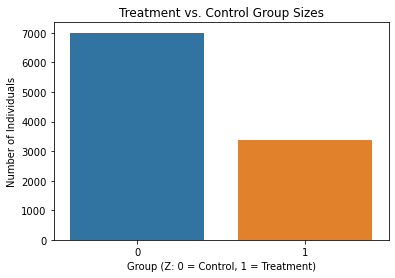

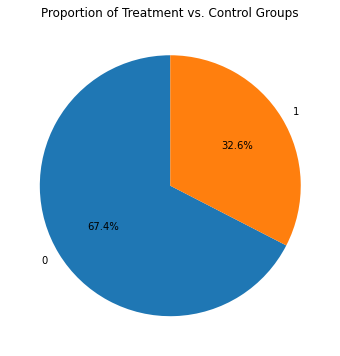

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for group counts
plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('Treatment vs. Control Group Sizes')
plt.xlabel('Group (Z: 0 = Control, 1 = Treatment)')
plt.ylabel('Number of Individuals')
plt.show()

# Pie chart for group proportions
plt.figure(figsize=(6, 6))
plt.pie(group_proportions, labels=group_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Treatment vs. Control Groups')
plt.show()


In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=data['GrowthMindsetIntervention'], columns='count')

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("The groups are significantly imbalanced.")
else:
    print("The groups are not significantly imbalanced.")


Chi-Square Statistic: 0.0
P-Value: 1.0
The groups are not significantly imbalanced.


                           FutureSuccessExpectations  StudentRaceEthnicity  \
GrowthMindsetIntervention                                                    
0                                           5.222349              5.241045   
1                                           5.362884              5.185875   

                           StudentGender  FirstGenCollegeStatus  \
GrowthMindsetIntervention                                         
0                               1.498787               0.646068   
1                               1.471631               0.599586   

                           SchoolUrbanicity  PreInterventionFixedMindset  \
GrowthMindsetIntervention                                                  
0                                  2.442272                    -0.009394   
1                                  2.459220                    -0.104777   

                           SchoolAchievementLevel  SchoolMinorityComposition  \
GrowthMindsetIntervention        

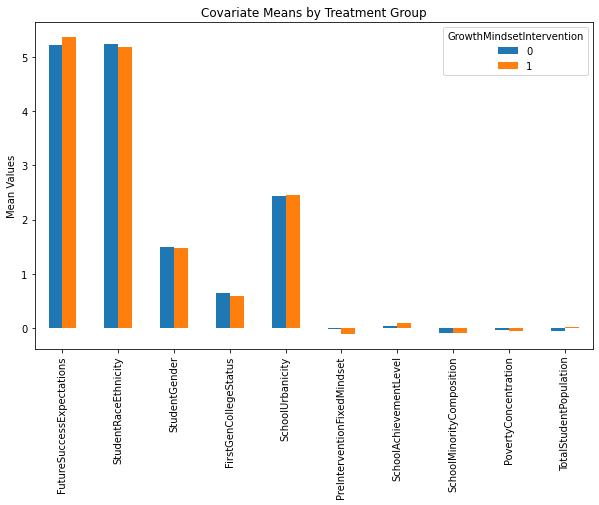

In [20]:
# Compare mean values of covariates between treatment and control groups
renamed_covariate_cols = [
    'FutureSuccessExpectations',
    'StudentRaceEthnicity',
    'StudentGender',
    'FirstGenCollegeStatus',
    'SchoolUrbanicity',
    'PreInterventionFixedMindset',
    'SchoolAchievementLevel',
    'SchoolMinorityComposition',
    'PovertyConcentration',
    'TotalStudentPopulation'
]

covariate_means = data.groupby('GrowthMindsetIntervention')[renamed_covariate_cols].mean()
print(covariate_means)

# Visualize covariate balance
covariate_means.T.plot(kind='bar', figsize=(10, 6))
plt.title('Covariate Means by Treatment Group')
plt.ylabel('Mean Values')
plt.show()
